In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, tree, ensemble, learning_curve

import numpy as np
import pandas as pd

/home/ar600/anaconda2/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
digits = datasets.load_digits()

In [7]:
X = digits.data
y = digits.target

In [9]:
X.shape

(1797, 64)

In [12]:
dtree = tree.DecisionTreeClassifier()

In [15]:
cv_size = 10
tree_scores = cross_validation.cross_val_score(dtree, X, y, cv=cv_size)

In [26]:
ans1 = tree_scores.mean()
print ans1

0.837535569718


In [19]:
def plot_scores(scores):
    pylab.grid(True)
    pylab.plot(range(cv_size), scores, label='cv scores')
    pylab.ylim((0.0, 1.05))
    pylab.legend(loc='lower right')

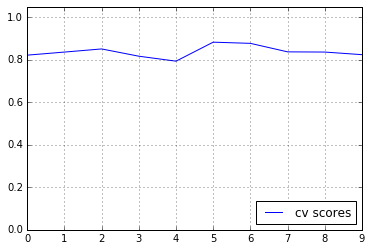

In [20]:
plot_scores(tree_scores)

In [23]:
with open('ans1.txt', 'w') as f_out:
        f_out.write(str(ans1))

In [24]:
bagging = ensemble.BaggingClassifier(dtree, n_estimators=100)
bag_scores = cross_validation.cross_val_score(bagging, X, y, cv=cv_size)

0.925986060452


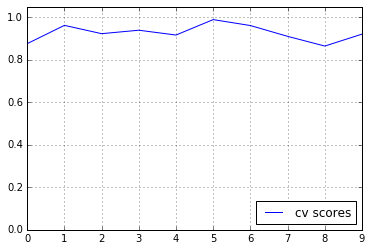

In [25]:
plot_scores(bag_scores)
ans2 = bag_scores.mean()
print ans2
with open('ans2.txt', 'w') as f_out:
        f_out.write(str(ans2))

0.934826190111


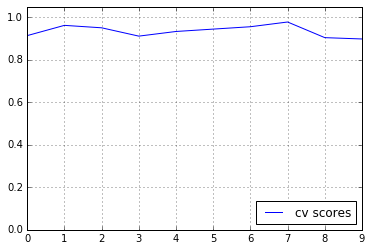

In [27]:
n_f = int(np.sqrt(X.shape[1]))
bagging2 = ensemble.BaggingClassifier(dtree, n_estimators=100, max_features=n_f)
bag_scores = cross_validation.cross_val_score(bagging2, X, y, cv=cv_size)

plot_scores(bag_scores)
ans3 = bag_scores.mean()
print ans3
with open('ans3.txt', 'w') as f_out:
        f_out.write(str(ans3))

0.954932023264


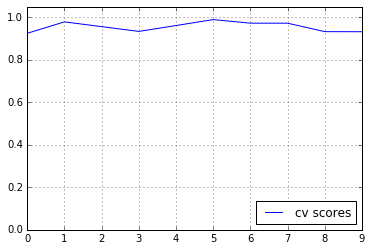

In [29]:
tree_f = tree.DecisionTreeClassifier(max_features=n_f)
bagging3 = ensemble.BaggingClassifier(tree_f, n_estimators=100)
bag_scores = cross_validation.cross_val_score(bagging3, X, y, cv=cv_size)

plot_scores(bag_scores)
ans4 = bag_scores.mean()
print ans4
with open('ans4.txt', 'w') as f_out:
        f_out.write(str(ans4))

In [33]:
%%time

n_trees = [1] + range(5,100,5)
scoring = []
for n_tree in n_trees:
    estimator = ensemble.RandomForestClassifier(n_estimators = n_tree, min_samples_split=5, random_state=1)
    score = cross_validation.cross_val_score(estimator, X, y, 
                                             scoring = 'accuracy', cv = cv_size)    
    scoring.append(score)
scoring = np.asmatrix(scoring)

CPU times: user 37.9 s, sys: 0 ns, total: 37.9 s
Wall time: 37.7 s


In [34]:
scoring

matrix([[ 0.72972973,  0.79234973,  0.73480663,  0.66111111,  0.72625698,
          0.69832402,  0.79888268,  0.82022472,  0.66666667,  0.69886364],
        [ 0.83243243,  0.91803279,  0.84530387,  0.83333333,  0.93854749,
          0.89385475,  0.89385475,  0.93258427,  0.86440678,  0.86931818],
        [ 0.88108108,  0.93989071,  0.9281768 ,  0.90555556,  0.9273743 ,
          0.94972067,  0.94413408,  0.93820225,  0.89265537,  0.92045455],
        [ 0.88648649,  0.97814208,  0.93922652,  0.91666667,  0.94413408,
          0.97765363,  0.97206704,  0.94382022,  0.89830508,  0.92613636],
        [ 0.88648649,  0.96174863,  0.9281768 ,  0.92777778,  0.94972067,
          0.96648045,  0.97206704,  0.96629213,  0.89830508,  0.9375    ],
        [ 0.8972973 ,  0.96174863,  0.93370166,  0.94444444,  0.94972067,
          0.96089385,  0.97206704,  0.96067416,  0.89830508,  0.9375    ],
        [ 0.90810811,  0.96721311,  0.93370166,  0.96111111,  0.96089385,
          0.96648045,  0.9664804

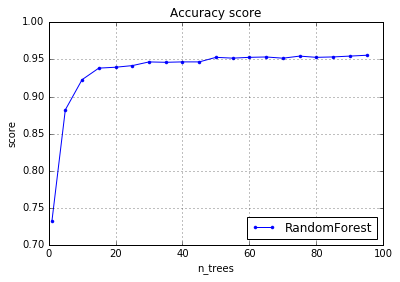

In [35]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

In [41]:
%%time
total_features = X.shape[1]
n_features = np.arange(0.1,1.1,0.1)
scoring = []
for n_feature in n_features:
    n_feat = int(n_feature*total_features)
    estimator = ensemble.RandomForestClassifier(n_estimators = 50, min_samples_split=5, random_state=1, max_features=n_feat)
    score = cross_validation.cross_val_score(estimator, X, y, 
                                             scoring = 'accuracy', cv = cv_size)    
    scoring.append(score)
scoring = np.asmatrix(scoring)

CPU times: user 41.9 s, sys: 0 ns, total: 41.9 s
Wall time: 41.4 s


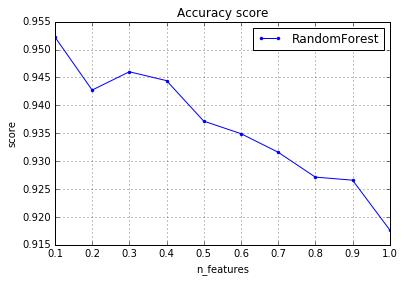

In [42]:
pylab.plot(n_features, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('n_features')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='upper right')

In [44]:
estimator1 = ensemble.RandomForestClassifier(n_estimators = 50, min_samples_split=5, random_state=1, max_depth=5)
estimator2 = ensemble.RandomForestClassifier(n_estimators = 50, min_samples_split=5, random_state=1)

score1 = cross_validation.cross_val_score(estimator1, X, y, scoring = 'accuracy', cv = cv_size) 
score2 = cross_validation.cross_val_score(estimator2, X, y, scoring = 'accuracy', cv = cv_size)

print score1.mean()
print score2.mean()

0.908841462279
0.952751278756
